# Import Libraries

In [615]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [616]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# Exploratory Data Analysis

In [617]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [618]:
round(df.describe(), 2) 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.00,5110.00,5110.0,5110.00,5110.00,4909.00,5110.00
mean,36517.83,43.23,0.1,0.05,106.15,28.89,0.05
std,21161.72,22.61,0.3,0.23,45.28,7.85,0.22
min,67.00,0.08,0.0,0.00,55.12,10.30,0.00
25%,17741.25,25.00,0.0,0.00,77.24,23.50,0.00
50%,36932.00,45.00,0.0,0.00,91.88,28.10,0.00
75%,54682.00,61.00,0.0,0.00,114.09,33.10,0.00
max,72940.00,82.00,1.0,1.00,271.74,97.60,1.00


In [619]:
round(df.describe(exclude=['float', 'int64']), 2)

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [620]:
# Check data types of each column
data_types = df.dtypes
print("Data types of each column:\n", data_types)

Data types of each column:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [621]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [622]:
print((df.isna().sum()/len(df))*100)


id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64


In [623]:
# Check unique values for categorical columns
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
for col in categorical_columns:
    unique_values = df[col].nunique()
    print(f"Number of unique values in {col}: {unique_values}")

Number of unique values in gender: 3
Number of unique values in ever_married: 2
Number of unique values in work_type: 5
Number of unique values in Residence_type: 2
Number of unique values in smoking_status: 4


In [624]:
# Distribution of categorical features
for col in categorical_columns:
    value_counts = df[col].value_counts()
    print(f"Distribution of values in {col}:\n{value_counts}\n")

Distribution of values in gender:
gender
Female    2994
Male      2115
Other        1
Name: count, dtype: int64

Distribution of values in ever_married:
ever_married
Yes    3353
No     1757
Name: count, dtype: int64

Distribution of values in work_type:
work_type
Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: count, dtype: int64

Distribution of values in Residence_type:
Residence_type
Urban    2596
Rural    2514
Name: count, dtype: int64

Distribution of values in smoking_status:
smoking_status
never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: count, dtype: int64



In [625]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# Display duplicates if any
if duplicate_rows > 0:
    print("Duplicate rows:\n", df[df.duplicated()])

Number of duplicate rows: 0


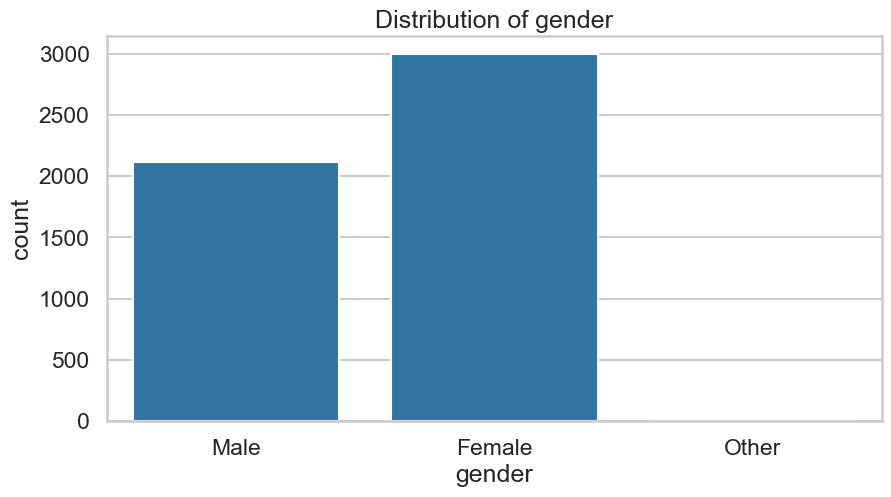

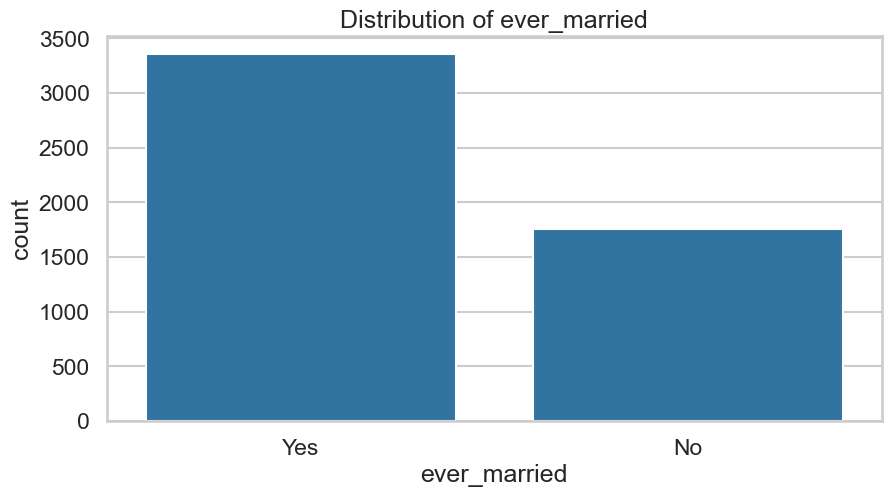

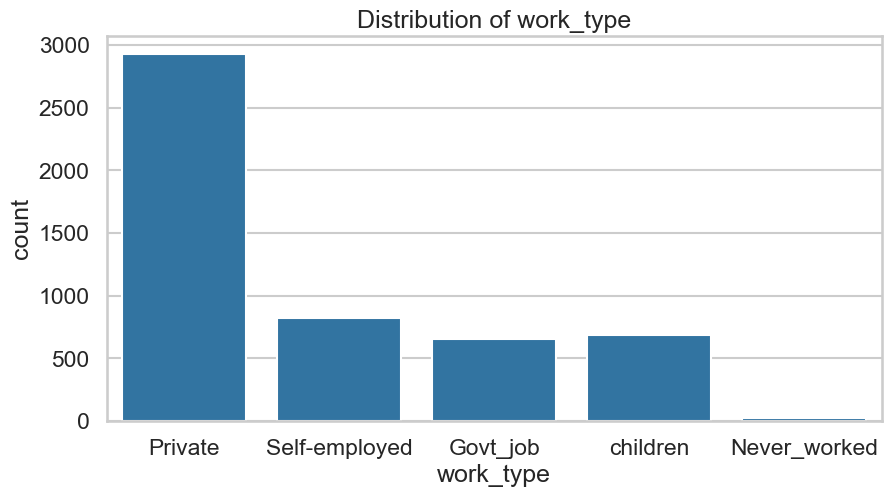

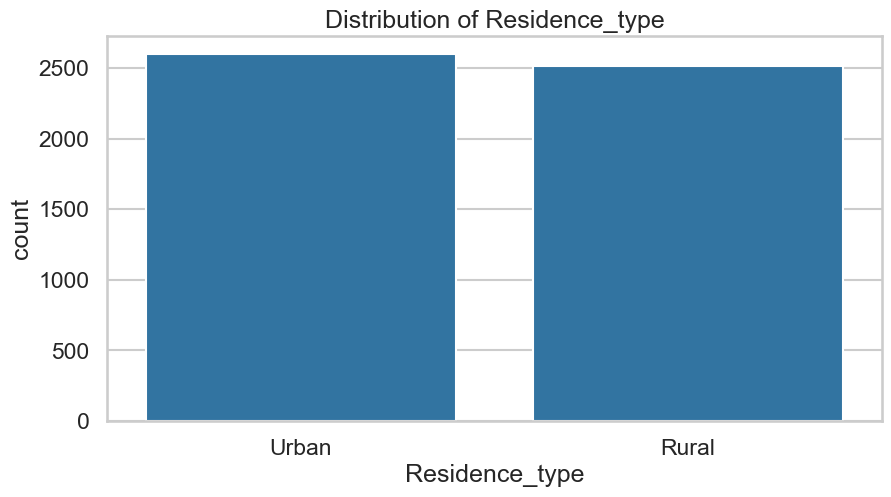

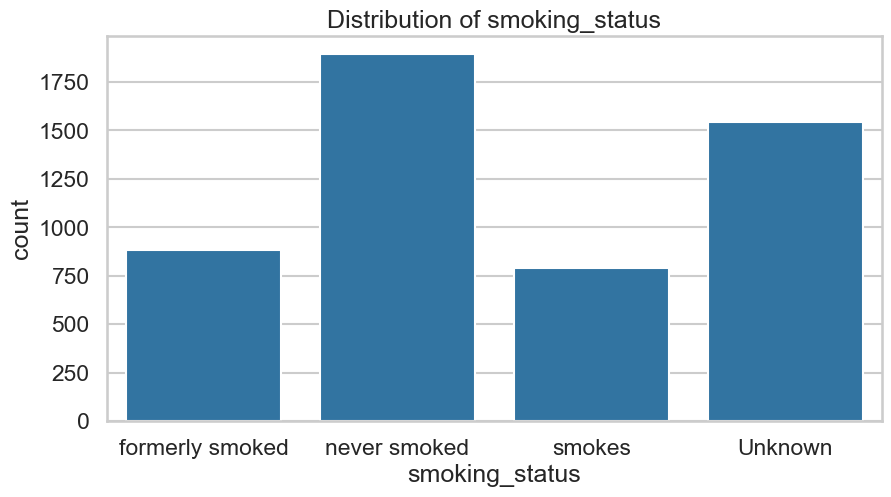

In [626]:
# Visualize distribution for categorical features
for col in categorical_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=col, data=df)
    plt.title(f'Distribution of {col}')
    plt.show()    

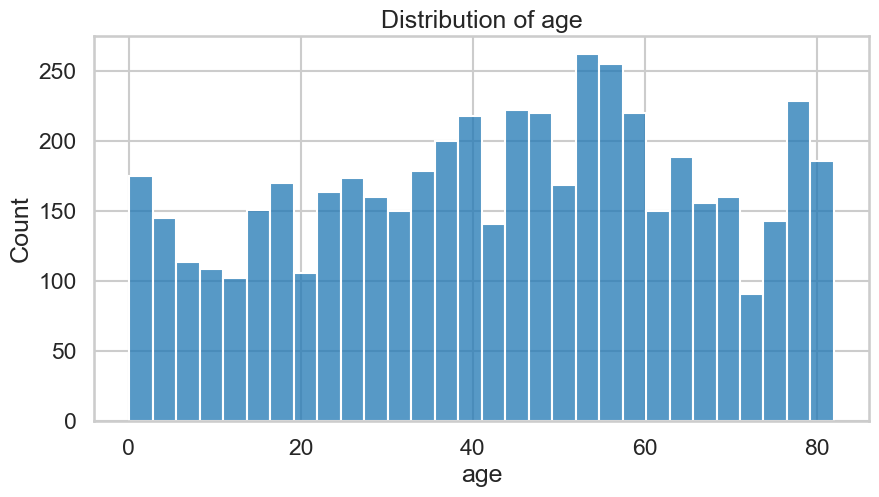

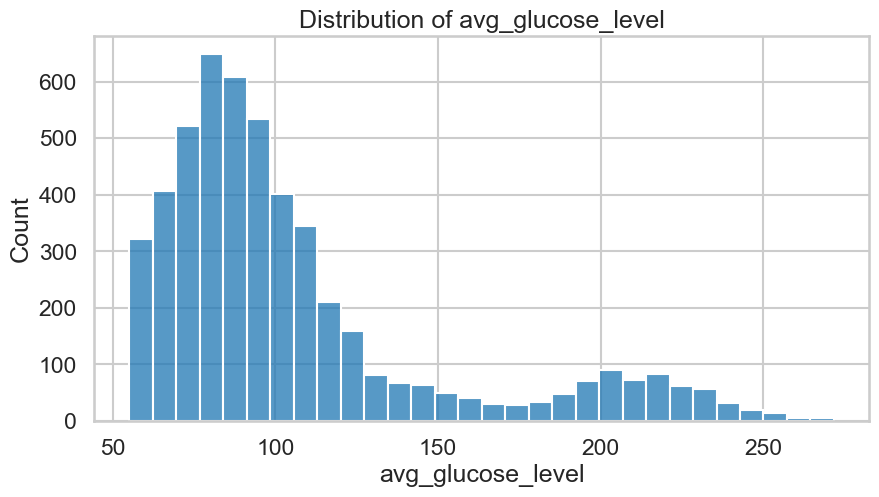

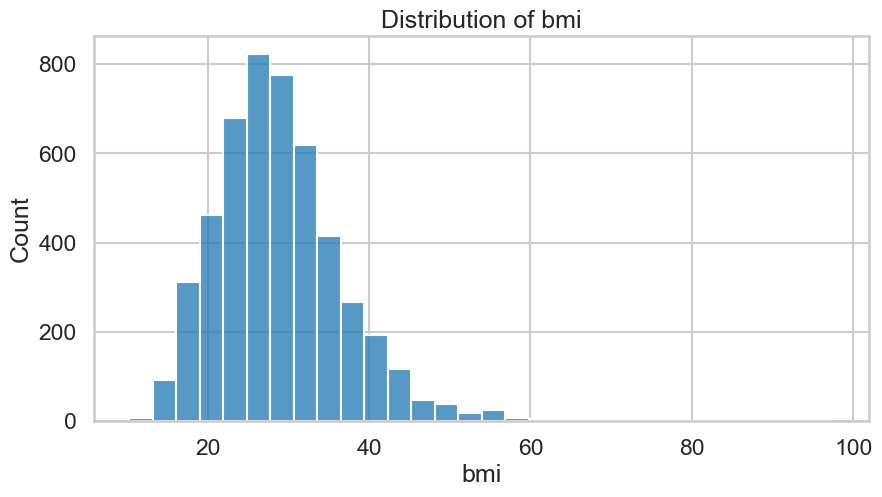

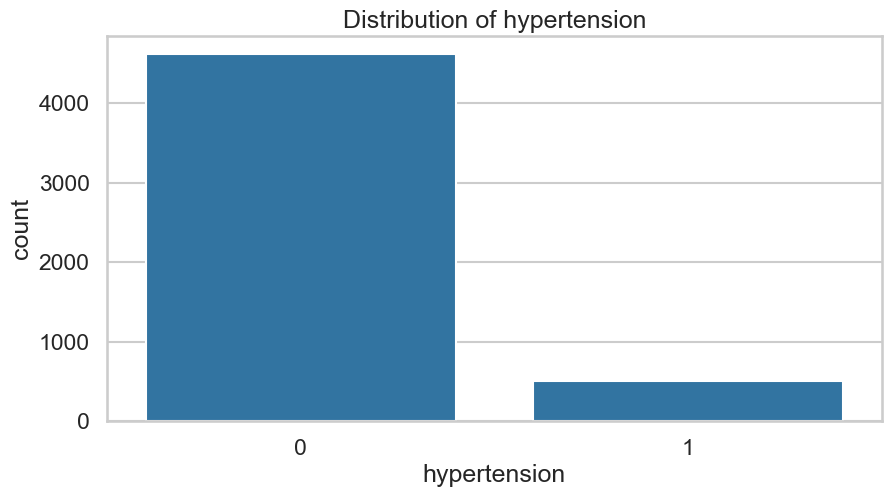

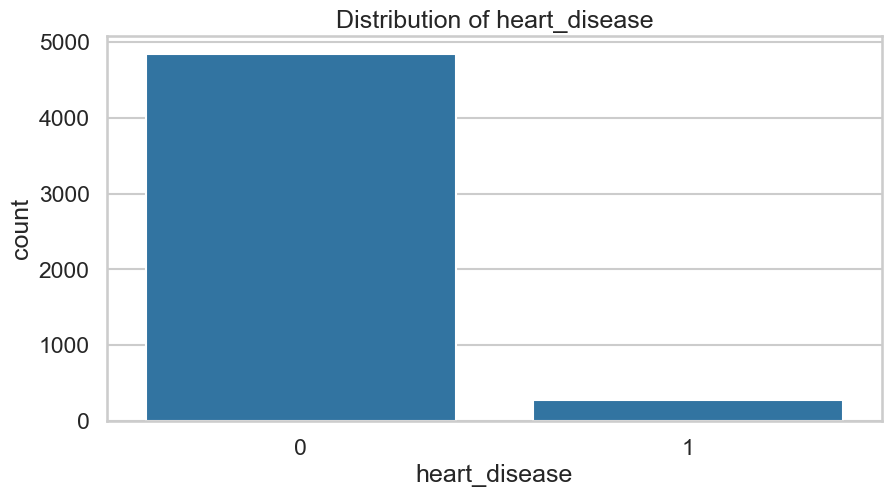

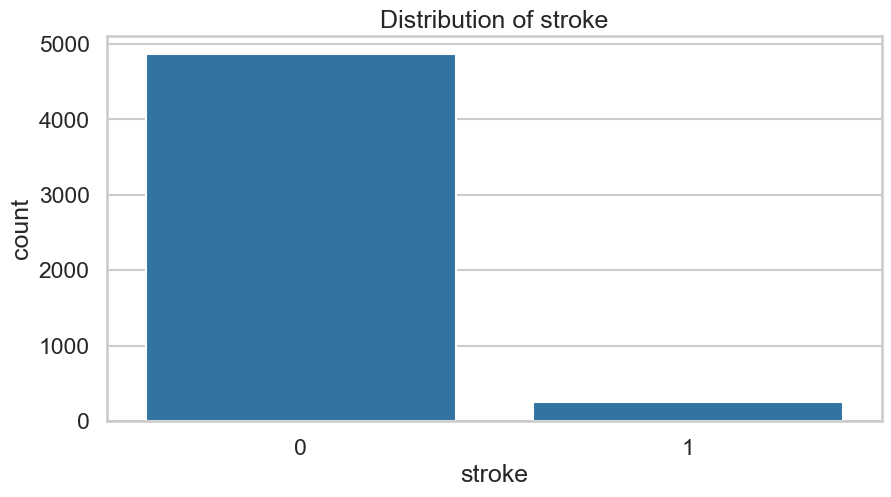

In [627]:
import matplotlib.pyplot as plt
import seaborn as sns

# Exclude 'id' column and identify numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
numerical_columns = numerical_columns.drop('id')  # Exclude 'id'

# Separate continuous and boolean numerical columns
continuous_columns = ['age', 'avg_glucose_level', 'bmi']
boolean_columns = ['hypertension', 'heart_disease', 'stroke']

# Plot distributions for continuous numerical features
for col in continuous_columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(df[col], bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

# Plot distributions for boolean numerical features
for col in boolean_columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=df[col])
    plt.title(f'Distribution of {col}')
    plt.show()


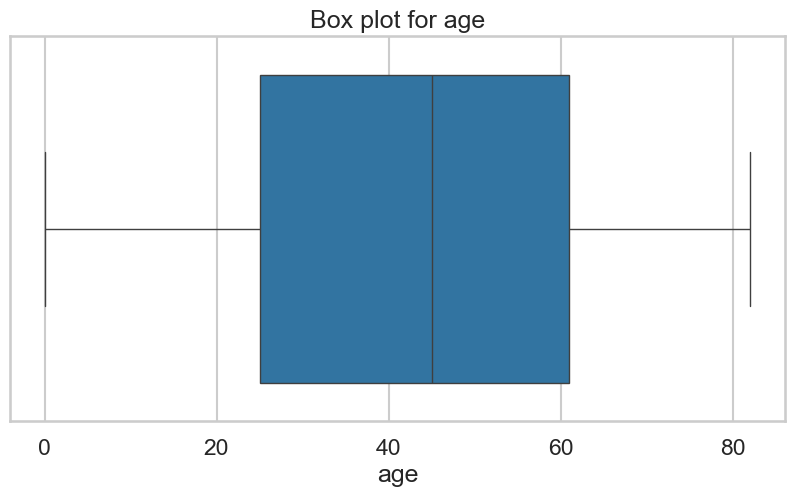

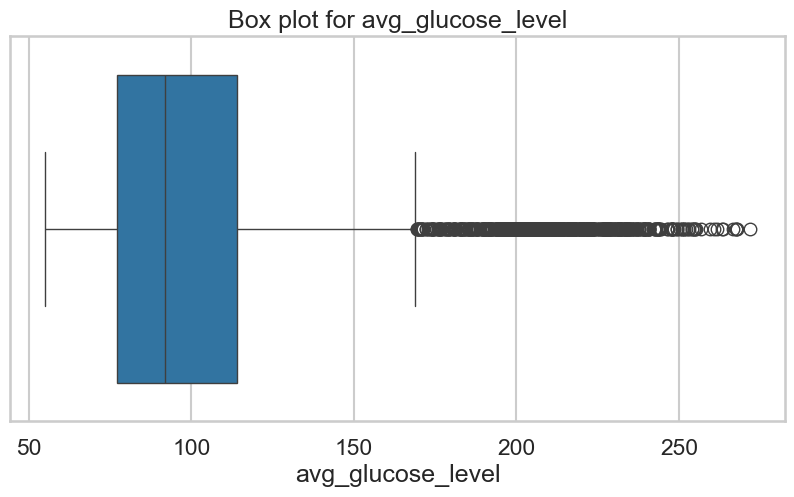

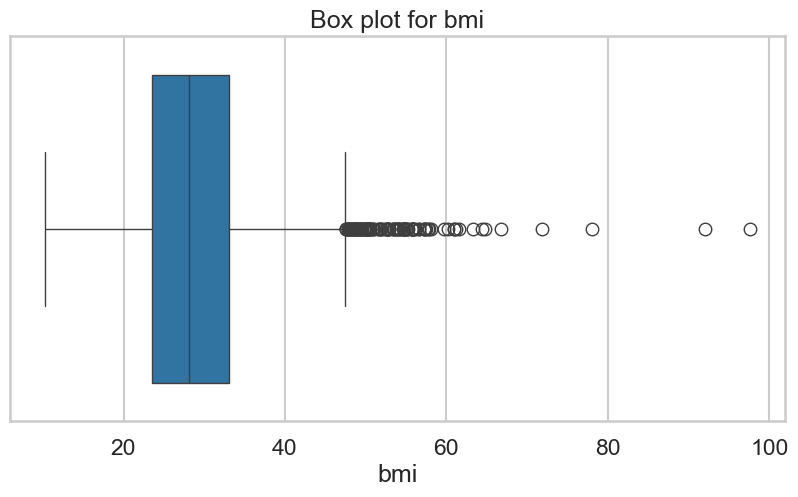

In [628]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot box plot for a given column
def plot_box(column_name):
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=df[column_name])
    plt.title(f'Box plot for {column_name}')
    plt.show()

# Columns to examine
columns_to_examine = ['age', 'avg_glucose_level', 'bmi']  # Specify the columns you want to examine

# Plot box plots for each column
for column in columns_to_examine:
    plot_box(column)


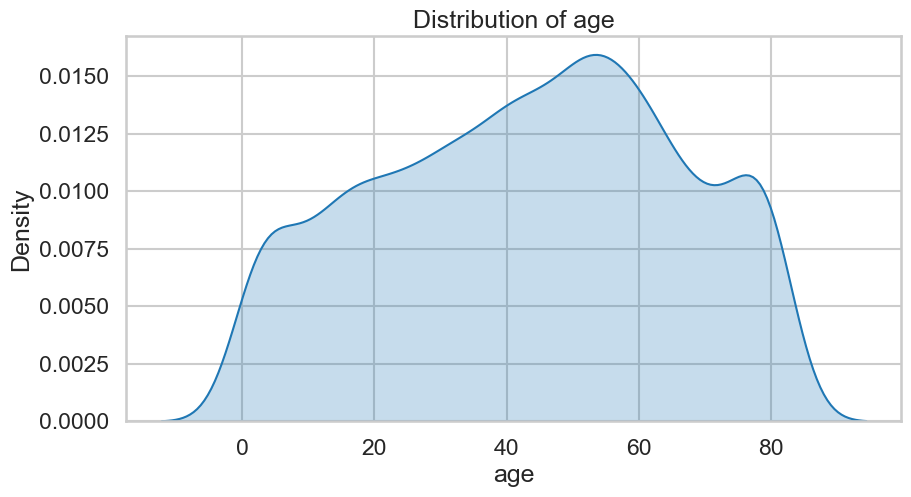

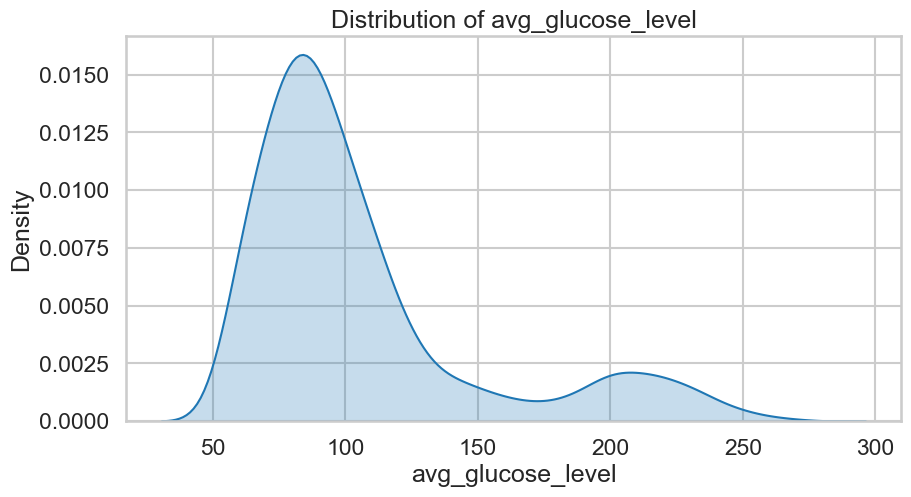

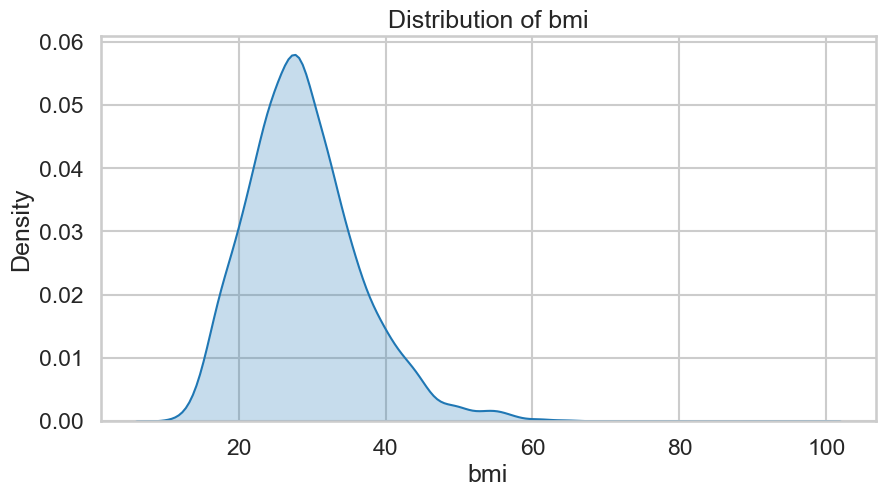

In [629]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to plot box plot for a given column
def plot_box(column_name):
    plt.figure(figsize=(10, 5))
    sns.kdeplot(df[column_name], fill=True)
    plt.title(f'Distribution of {column_name}')
    plt.show()

# Columns to examine
columns_to_examine = ['age', 'avg_glucose_level', 'bmi']  # Specify the columns you want to examine

# Plot box plots for each column
for column in columns_to_examine:
    plot_box(column)

In [630]:
# Function to print summary statistics and identify outliers for a given column
def examine_outliers(column_name):
    # Summary statistics
    summary = df[column_name].describe()
    print(f"Summary statistics for {column_name}:\n{summary.round(3)}\n")
    
    # Calculate IQR
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    
    # Define bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print("Quartiles and IQR: \n")
    print(f"Q1: {Q1.round(3)}, Q3: {Q3.round(3)}")
    print(f"IQR: {IQR.__round__(3)}")
    print(f"Outlier bounds for {column_name}: \n")
    print(f"Lower bound: {lower_bound.__round__(3)}, Upper bound: {upper_bound.__round__(3)}\n")
    
    # Identify outliers
    outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
    print(f"Number of outliers in {column_name}: {outliers.shape[0]}")
    print(f"Outliers:\n{outliers[[column_name]]}\n")

# Examine outliers for each column
for column in columns_to_examine:
    examine_outliers(column)

Summary statistics for age:
count    5110.000
mean       43.227
std        22.613
min         0.080
25%        25.000
50%        45.000
75%        61.000
max        82.000
Name: age, dtype: float64

Quartiles and IQR: 

Q1: 25.0, Q3: 61.0
IQR: 36.0
Outlier bounds for age: 

Lower bound: -29.0, Upper bound: 115.0

Number of outliers in age: 0
Outliers:
Empty DataFrame
Columns: [age]
Index: []

Summary statistics for avg_glucose_level:
count    5110.000
mean      106.148
std        45.284
min        55.120
25%        77.245
50%        91.885
75%       114.090
max       271.740
Name: avg_glucose_level, dtype: float64

Quartiles and IQR: 

Q1: 77.245, Q3: 114.09
IQR: 36.845
Outlier bounds for avg_glucose_level: 

Lower bound: 21.978, Upper bound: 169.358

Number of outliers in avg_glucose_level: 627
Outliers:
      avg_glucose_level
0                228.69
1                202.21
3                171.23
4                174.12
5                186.21
...                 ...
5061           

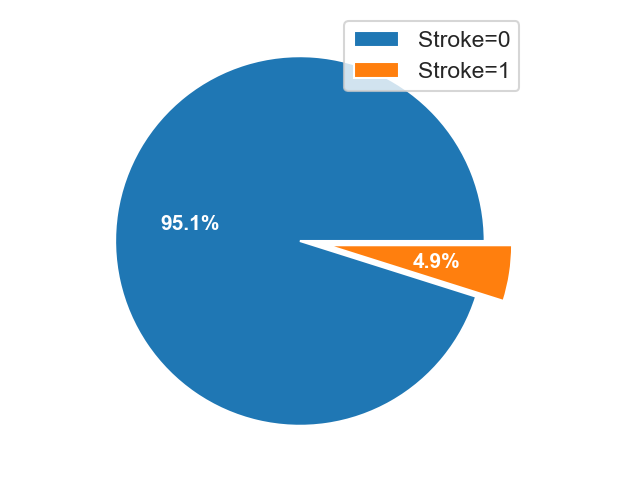

In [631]:
x = df['stroke'].value_counts()


explode = [0, 0.15]
labels = ['Stroke=0', 'Stroke=1']
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(aspect="equal"))

plt.pie(x, explode=explode, shadow=False, autopct='%1.1f%%', labels=labels, textprops=dict(color="w", weight='bold', size=15))
plt.legend()
plt.show()

                        age  avg_glucose_level       bmi  hypertension  \
age                1.000000           0.238171  0.333398      0.276398   
avg_glucose_level  0.238171           1.000000  0.175502      0.174474   
bmi                0.333398           0.175502  1.000000      0.167811   
hypertension       0.276398           0.174474  0.167811      1.000000   
heart_disease      0.263796           0.161857  0.041357      0.108306   
stroke             0.245257           0.131945  0.042374      0.127904   

                   heart_disease    stroke  
age                     0.263796  0.245257  
avg_glucose_level       0.161857  0.131945  
bmi                     0.041357  0.042374  
hypertension            0.108306  0.127904  
heart_disease           1.000000  0.134914  
stroke                  0.134914  1.000000  


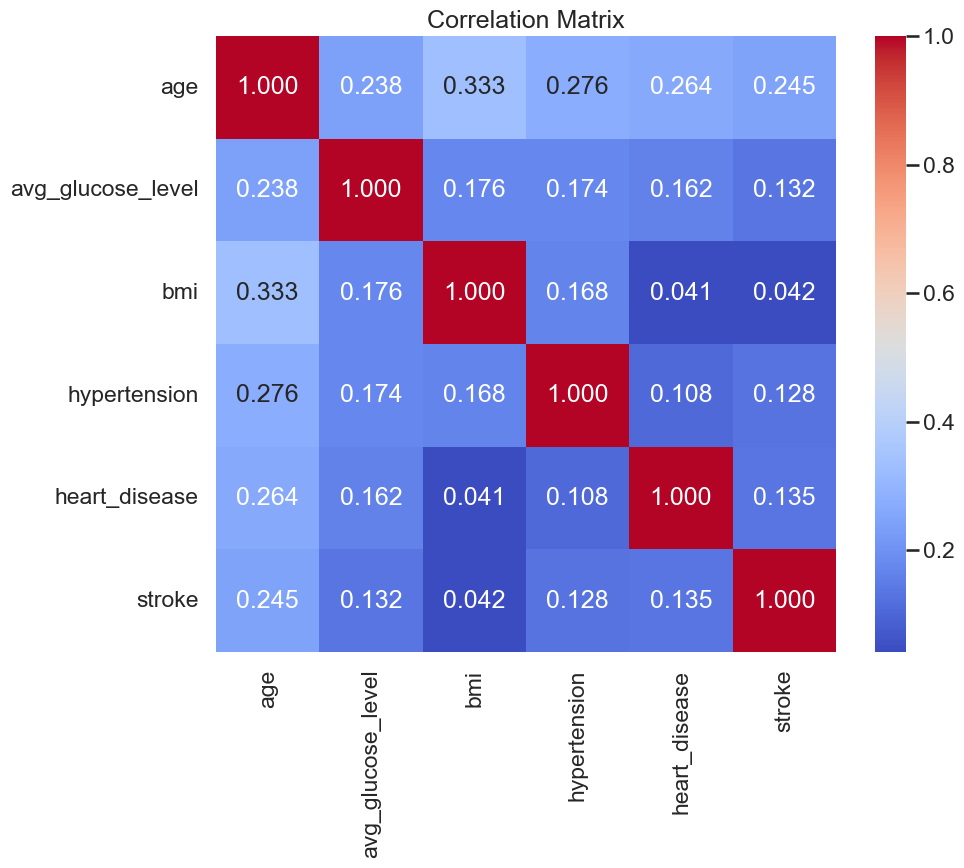

In [632]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Select the subset of columns
subset_df = df[['age', 'avg_glucose_level', 'bmi', 'hypertension', 'heart_disease', 'stroke']]

# Calculate the correlation matrix for the selected subset
correlation_matrix = subset_df.corr()

# Print the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.3f')
plt.title('Correlation Matrix')
plt.show()


In [633]:
# Strongest correlations with 'stroke'
strong_correlations = correlation_matrix['stroke'].sort_values(ascending=False)
print(strong_correlations)

stroke               1.000000
age                  0.245257
heart_disease        0.134914
avg_glucose_level    0.131945
hypertension         0.127904
bmi                  0.042374
Name: stroke, dtype: float64


# Data Preprocessing

In [634]:
# Drop 'id' column
df.drop('id', axis=1, inplace=True)


In [635]:
# Fill missing values in 'bmi' column with the mean
mean_bmi = df['bmi'].mean()
df['bmi'].fillna(mean_bmi, inplace=True)

# Check for missing values after filling
missing_values = df.isnull().sum()
print("Missing values after filling:\n", missing_values)

Missing values after filling:
 gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


/var/folders/t7/d2wdwfpn2bx5mfnm12djdfmc0000gn/T/ipykernel_13365/3796680674.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(mean_bmi, inplace=True)


In [636]:
# one hot encoding for categorical columns
df = pd.get_dummies(df, columns=['gender', 'work_type', 'Residence_type', 'smoking_status'], drop_first=False)
# binary encoding for ever_married column
df['ever_married'] = df['ever_married'].map({'Yes': 1, 'No': 0})
df.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,1,228.69,36.600000,1,False,True,False,...,False,True,False,False,False,True,False,True,False,False
1,61.0,0,0,1,202.21,28.893237,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False
2,80.0,0,1,1,105.92,32.500000,1,False,True,False,...,False,True,False,False,True,False,False,False,True,False
3,49.0,0,0,1,171.23,34.400000,1,True,False,False,...,False,True,False,False,False,True,False,False,False,True
4,79.0,1,0,1,174.12,24.000000,1,True,False,False,...,False,False,True,False,True,False,False,False,True,False


In [637]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Standardization
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df.drop(columns=['stroke']))

# Normalization
normalizer = MinMaxScaler()
df_normalized = normalizer.fit_transform(df.drop(columns=['stroke']))



In [638]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
# from sklearn.datasets import make_classification
# from collections import Counter
# 
# Separate features and target
X = df.drop(columns=['stroke'])
y = df['stroke']
# 
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# 
# # Apply SMOTE
# sm = SMOTE(random_state=42)
# X_res, y_res = sm.fit_resample(X_train, y_train)
# print(f'Dataset shape before resampling：{Counter(y_train)}')
# print(f'Dataset shape before resampling：{Counter(y_res)}')


In [639]:

print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train == 0)))

sm = SMOTE(random_state=2)
X_res, y_res = sm.fit_resample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_res == 0)) )



Before OverSampling, counts of label '1': 160
Before OverSampling, counts of label '0': 3417 

After OverSampling, the shape of train_X: (6834, 20)
After OverSampling, the shape of train_y: (6834,) 

After OverSampling, counts of label '1': 3417
After OverSampling, counts of label '0': 3417


In [640]:
from sklearn.feature_selection import VarianceThreshold

# Remove low variance features
selector = VarianceThreshold(threshold=0.1)
df_reduced = selector.fit_transform(df.drop(columns=['stroke']))


In [641]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [642]:
# Check distribution of target variable in original data
print("Original class distribution in the dataset:")
print(df['stroke'].value_counts())

# Check distribution of target variable in the resampled training data
print("Class distribution in training data after SMOTE:")
print(y_res.value_counts())



Original class distribution in the dataset:
stroke
0    4861
1     249
Name: count, dtype: int64
Class distribution in training data after SMOTE:
stroke
0    3417
1    3417
Name: count, dtype: int64


# SVM

Accuracy: 0.7768836869056328
Confusion Matrix:
[[496 201]
 [104 566]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.71      0.76       697
           1       0.74      0.84      0.79       670

    accuracy                           0.78      1367
   macro avg       0.78      0.78      0.78      1367
weighted avg       0.78      0.78      0.78      1367



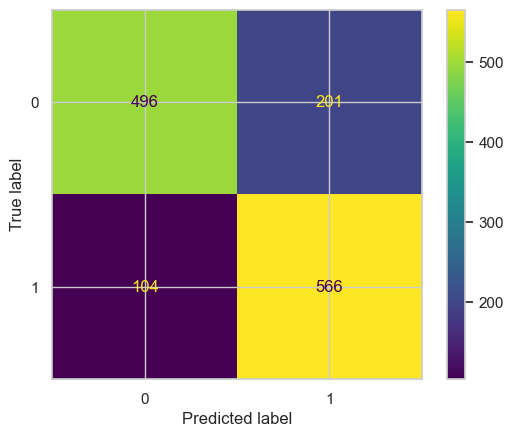

In [643]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Create the model
svm_model = SVC()

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred = svm_model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Display the confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Display the classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# confusion matrix plot
confusing_matrix = confusion_matrix(y_test, y_pred)
sns.set_context('notebook')
ConfusionMatrixDisplay(confusion_matrix=confusing_matrix).plot()
plt.show()


